# TP 3 
Nous travaillons sur la base de données diabetes de python. La base initiale comporte n “ 442
patients et p “ 10 covariables. La variable Y à expliquer est un score correspondant à l’évolution de la
maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en y ajoutant 200 variables
explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti notre jeu de données, il a volontairement
mélangé les variables entre elle de façon aléatoire. Bien entendu le robot a ensuite pris soin
d’effacer toute trace de son acte crapuleux si bien que nous ne connaissons pas les variables pertinentes.
La nouvelle base de données comporte n “ 442 patients et p “ 210 covariables, notés X. Saurez-vous
déjouer les plans de ce robot farceur et retrouver les variables pertinentes ?

### (Q1) 
Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/
portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer.
Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives
et le nombre d’observations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
from scipy.stats import t

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [197]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV

In [3]:
df = pd.read_csv('https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv', header=None)

In [4]:
y = df.iloc[:,-1:]
x = df.iloc[:,:-1]

In [5]:
print("Il y a {1} variables explicatives et {0} observations".format(*x.shape))

Il y a 210 variables explicatives et 442 observations


### (Q2)
Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ?
Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à
expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des
autres). Commenter les graphiques obtenus.

In [6]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,1.934099e-17,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.436711e+00,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.602634e-01,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,4.227517e-02,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.433939e-01,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.737036e+00,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00


In [7]:
isCenter = all(x.mean()<10**-10)
isNormalized = all(round(x.std(ddof=0), 6)==1.0)

In [8]:
isCenter, isNormalized

(True, True)

Les données explicatives sont centrées et normalisées. Cependant on constate que la normalisation a été effectuté via le calcul biaisé de la variance: $\frac {\sum (x - \bar x)}{n} $

In [9]:
print("La moyenne de la variable à expliquer est de {} et sa variance vaut {}: elle n'est ni centrée ni normalisée.".format(int(y.mean()), int(y.std())))

La moyenne de la variable à expliquer est de 152 et sa variance vaut 77: elle n'est ni centrée ni normalisée.


In [10]:
sample_x = x.sample(4, axis=1)

In [11]:
sample = sample_x.add(y, fill_value=0)

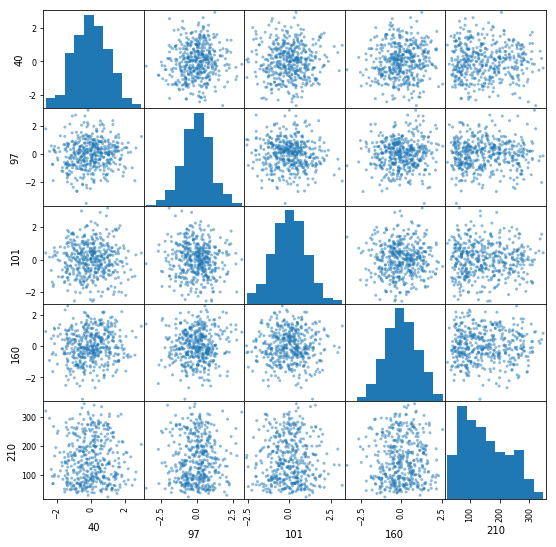

In [12]:
pd.plotting.scatter_matrix(sample, figsize=(9,9))
plt.show()

TODO commenter graphes

### (Q3)
Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle Xtrain,
un pour tester le modèle Xtest. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles
de chacun des 2 échantillons.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =  1)

In [14]:
print("La taille de x_train et x_test sont respectivement {} et {}".format(x_train.shape, x_test.shape))

La taille de x_train et x_test sont respectivement (353, 210) et (89, 210)


### (Q4) 
Donner la matrice des correlations calculée sur Xtrain. Tracer le graphe de la décroissance des
valeurs propres de la matrice de corrélation. Expliquer pourquoi il est légitime de ne garder que les
premières variables de l’ACP. On gardera 60 variables dans la suite.

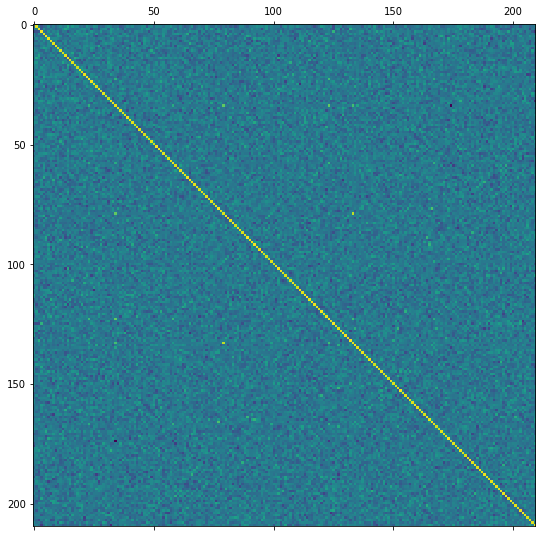

In [15]:
plt.figure(figsize=(9,9))
plt.matshow(x_train.cov(), fignum=1)

In [16]:
U, S, V = np.linalg.svd(x_train.cov())

In [17]:
S.shape

(210,)

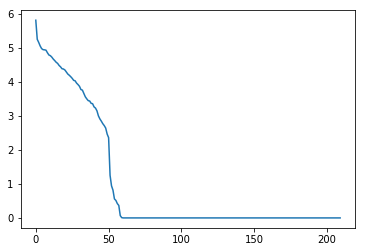

In [18]:
plt.plot(S);

to do : expliquer prq 60 eres variables acp

### (Q5) 
Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui
consiste à appliquer OLS avec Y et X train V p1:60q , où V p1:60q contient les vecteurs propres (associés
aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec
intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de
même avec la méthode des moindres carrés classique.

In [19]:
U_pca = U[:,:60]
V_pca = V.T[:,:60]
S_pca = np.diag(S[:60])

In [20]:
V_pca.shape

(210, 60)

In [21]:
x_pca = x_train @ V_pca

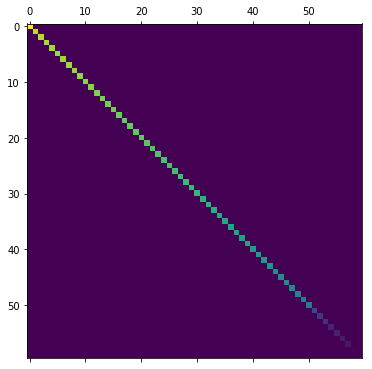

In [22]:
plt.figure(figsize=(6,6))
plt.matshow(x_pca.cov(), fignum=1)

In [24]:
lr = LinearRegression()

In [25]:
x_train.shape , y_train.shape

((353, 210), (353, 1))

In [26]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
lr_pca = LinearRegression()

In [28]:
lr_pca.fit(x_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

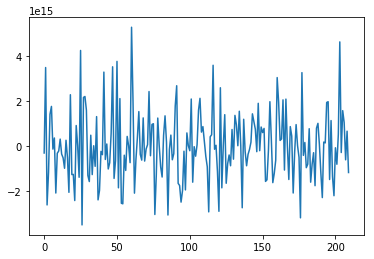

In [29]:
plt.plot(lr.coef_[0])

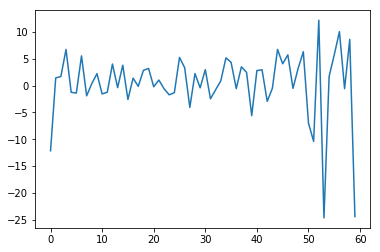

In [30]:
plt.plot(lr_pca.coef_[0])

### (Q6)
Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne
de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter.
Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension).
Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y
sut le train

In [31]:
lr.intercept_

array([152.48614554])

In [32]:
lr_pca.intercept_

array([150.58305697])

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
y_train.mean()

210    153.376771
dtype: float64

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(x_pca)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
x_cr = scaler.transform(x_pca)

In [38]:
y_cr = scaler.fit_transform(y)

In [39]:
lr_cr = LinearRegression()

In [40]:
lr_cr.fit(x_cr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lr_cr.intercept_

array([153.37677054])

### (Q7)
Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon
test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de
détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

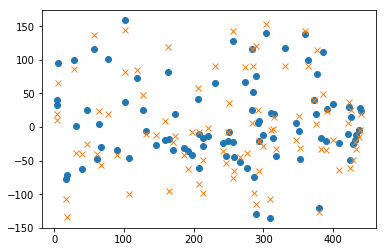

In [42]:
plt.plot(y_test - lr_pca.predict(x_test @ V_pca), "o")
plt.plot(y_test - lr.predict(x_test), "x")

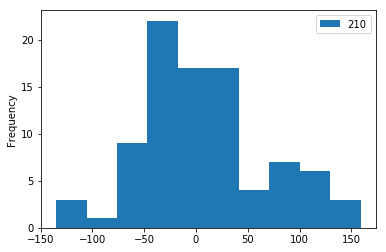

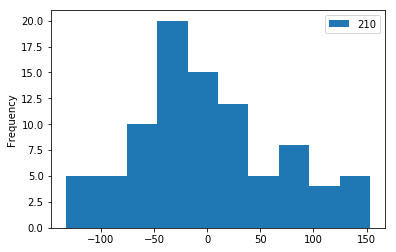

In [43]:
(y_test - lr_pca.predict(x_test @ V_pca)).plot.hist()
(y_test - lr.predict(x_test)).plot.hist()

In [44]:
lr_pca.score(x_test @ V_pca,y_test)

0.2984760669257358

In [45]:
lr.score(x_test,y_test)

0.1220186626510471

In [102]:
x_pca.shape

(353, 60)

In [106]:
mean_squared_error(lr_pca.predict(x_test @ V_pca), y_test)

3738.4002265609

In [107]:
mean_squared_error(lr.predict(x_test), y_test)

4678.736498807525

### (Q8)
Coder la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité
du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode.
C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables.
Afficher l’ordre de séléction des variables.

In [46]:
def regr(col, y_):
    gram = col.T @ col
    n = len(y_)
    rg = np.linalg.matrix_rank(gram)
    gram_inv = np.linalg.inv(gram)
    theta_chap = gram_inv @  col.T @ y_.astype(float)
    ychap = theta_chap * col
    s2 = 1/(len(col)-rg)*np.linalg.norm(y_.values-ychap.values)**2
    ecart_type  = m.sqrt(s2*gram_inv)
    T_stat = theta_chap/ecart_type
    pval = (1 - t.cdf(abs(T_stat), n-rg)) * 2
    return T_stat, pval

In [47]:
def features_selection(df, target):
    regression =  [regr(col, target) for col in [df[[col]] for col in df.columns]]
    pvals = np.array(regression)[:,1]
    Tstats = np.array(regression)[:,0]
    return Tstats, pvals

In [48]:
concat = pd.concat([x_train, pd.Series(np.ones(len(x_train)), name= 210, index=x_train.index)], axis = 1)

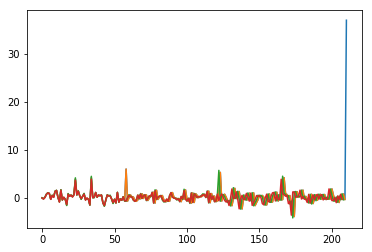

CPU times: user 3min 36s, sys: 8.73 s, total: 3min 45s
Wall time: 1min 40s


In [91]:
%%time
data = concat
features = []
theta = []
r =  y_train.copy()
pvals = []
pvals_selected = []
features_selected = []
flag = True
while not data.empty:
    regr_ = features_selection(data, r)
    mini = min(regr_[1])
    if mini < 0.1 and flag:
        pvals_selected.append(mini)
        features_selected.append(col)
    else:
        flag = False
    if len(features) <= 3:
        plt.plot(regr_[0].reshape(-1,1))
    pvals.append(mini)
    col = data.columns[regr_[1].tolist().index(mini)]
    lr_ = LinearRegression()
    lr_.fit(concat[col].values.reshape(-1,1), r)
    theta.append(lr_.coef_[0])
    r -= concat[col].apply(lambda x : x*theta[-1])
    data = data.drop(columns=col)
    features.append(col)
plt.show()

In [147]:
features_selected

[200, 210, 58, 123, 34, 167, 23, 174, 138]

In [108]:
features_selected = [58, 123, 84, 172, 43, 187, 110, 14, 208, 133, 41, 87]

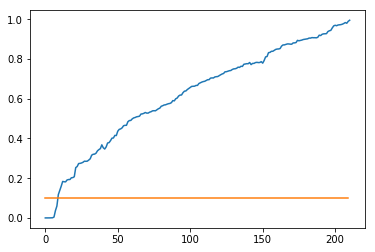

In [92]:
plt.plot(np.array(pvals).ravel())
plt.plot([0.1]*210)

In [109]:
x_selected = concat[features_selected]

In [110]:
lr_selected = LinearRegression()

In [111]:
lr_selected.fit(x_selected, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
concat_test = pd.concat([x_test, pd.Series(np.ones(len(x_test)), name= 210, index=x_test.index)], axis = 1)

In [120]:
lr_selected.score(concat_test[features_selected], y_test)

0.4232399368606522

In [124]:
mean_squared_error(lr_selected.predict(concat_test[features_selected]), y_test)

3073.5372651686325

### (Q11)
Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de
façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [126]:
from sklearn import model_selection

In [182]:
kf = model_selection.KFold(n_splits=4)

In [183]:
kf.get_n_splits(x)

4

In [189]:
list(kf.split(x))

[(array([111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
         124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
         137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
         150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
         163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
         176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
         189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
         202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
         215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,
         228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
         241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
         254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
         267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
         280, 281, 282, 283, 284, 285,

In [137]:
features_selected

[200, 210, 58, 123, 34, 167, 23, 174, 138]

In [144]:
np.logspace(0.1, 3.0, num=3)

array([   1.25892541,   35.48133892, 1000.        ])

In [190]:
r = []
for alpha in np.logspace(0.1, 3.0, num=20):
    ridge =  Ridge(alpha=alpha)
    risques = []
    for train_index, test_index in kf.split(x_train):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        ridge.fit(X_train, Y_train)
        risques.append(mean_squared_error(ridge.predict(X_test), Y_test))
    r.append(np.array(risques).mean())
    print('alpha :'+ str(alpha) + "----> risques mean :" + str(r[-1]))

alpha :1.2589254117941673----> risques mean :3806.269853870448
alpha :1.7890874899232194----> risques mean :3802.9175945396255
alpha :2.542512857880971----> risques mean :3798.652222235095
alpha :3.6132227567962514----> risques mean :3793.1802756002485
alpha :5.134832907437552----> risques mean :3786.1126409729295
alpha :7.297227644686393----> risques mean :3776.986561108468
alpha :10.370255908667641----> risques mean :3765.329939426598
alpha :14.737406155824797----> risques mean :3750.7908282558255
alpha :20.943662539726763----> risques mean :3733.368068643671
alpha :29.763514416313193----> risques mean :3713.7698736158227
alpha :42.297606196133856----> risques mean :3693.8650134959507
alpha :60.11008864405587----> risques mean :3677.0736613328527
alpha :85.42381193020124----> risques mean :3668.43894556977
alpha :121.3977189070074----> risques mean :3674.1645196294103
alpha :172.5210549942041----> risques mean :3700.699391689683
alpha :245.17358879792891----> risques mean :3753.84368

In [191]:
r.index(min(r))

12

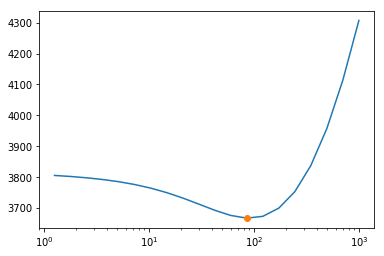

In [192]:
plt.plot(np.logspace(0.1, 3.0, num=20),r)
plt.xscale('log')
plt.plot(np.logspace(0.1, 3.0, num=20)[r.index(min(r))],min(r), 'o')
plt.show()

In [193]:
np.logspace(0.1, 3.0, num=20)[r.index(min(r))]

85.42381193020124

In [194]:
ridge_opt = Ridge(alpha=np.logspace(0.1, 3.0, num=20)[r.index(min(r))])

In [195]:
ridge_opt.fit(x_train, y_train)

Ridge(alpha=85.42381193020124, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [196]:
mean_squared_error(ridge_opt.predict(x_test), y_test)

3780.9320579310356

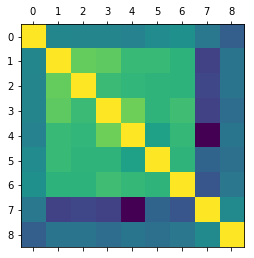

In [159]:
plt.matshow(df[features_selected].corr())

In [340]:
x_selected.columns

Int64Index([58, 123, 84, 172, 43, 187, 110, 14, 208, 133, 41, 87], dtype='int64')

In [198]:
lasso = LassoCV()

In [201]:
lasso.fit(x_train, y_train.values.ravel())

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [202]:
lasso.alpha_

6.722997658370211

In [212]:
mean_squared_error(lasso.predict(x_train), y_train)

3062.5074334697497

In [204]:
np.count_nonzero(lasso.coef_)

10

In [209]:
np.nonzero(lasso.coef_)[0]

array([ 17,  22,  58,  84, 123, 129, 135, 147, 167, 174])

In [206]:
lr_lasso = LinearRegression()

In [210]:
lr_lasso.fit(x_train[np.nonzero(lasso.coef_)[0]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [211]:
mean_squared_error(lr_lasso.predict(x_test[np.nonzero(lasso.coef_)[0]]), y_test)

3288.5106464433857

In [213]:
from sklearn import svm

In [219]:
[10**x for x in range(-2,3)]

[0.01, 0.1, 1, 10, 100]

In [224]:
from sklearn.ensemble import GradientBoostingRegressor

In [241]:
mse = []
r=[]
for d in [1,2,3,5,10,20,50,100]:
    gbr = GradientBoostingRegressor(max_depth = d)
    for train_index, test_index in kf.split(x_train):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        gbr.fit(X_train[np.nonzero(lasso.coef_)[0]], Y_train.values.ravel())
        mse.append(mean_squared_error(gbr.predict(X_test[np.nonzero(lasso.coef_)[0]]), Y_test))
    r.append(np.array(mse).mean())
    print('d :'+ str(d) + "----> risques mean :" + str(r[-1]))

d :1----> risques mean :3255.7424842985256
d :2----> risques mean :3308.3380322135963
d :3----> risques mean :3389.9590536262745
d :5----> risques mean :3472.795741087274
d :10----> risques mean :3739.3700071602448
d :20----> risques mean :4028.846925885447
d :50----> risques mean :4224.610189363926
d :100----> risques mean :4375.818181792762
